In [1]:
%cd ..

d:\~Perso\Etudes\DAC\NeuralNetworksDIY


Epoch 1
-------------------------------
Forward de Linear
Input : (8, 64)
Forward de TanH
Input : (8, 32)
Forward de Linear
Input : (8, 32)
Forward de TanH
Input : (8, 16)
Forward de Linear
Input : (8, 16)
Forward de TanH
Input : (8, 8)
Forward de Linear
Input : (8, 8)
Forward de Sigmoide
Input : (8, 2)
Output: (8, 2)
Shape of loss delta : (8, 2)
➡️ Backward de Sigmoide
Shape of delta : (8, 2)
Shape of inputs : (8, 2)
Backward de Sigmoide ✅
➡️ Backward de Linear
Shape of delta : (8, 2)
Shape of inputs : (8, 8)
Backward de Linear ✅
➡️ Backward de TanH
Shape of delta : (8, 8)
Shape of inputs : (8, 8)
Backward de TanH ✅
➡️ Backward de Linear
Shape of delta : (8, 8)
Shape of inputs : (8, 16)
Backward de Linear ✅
➡️ Backward de TanH
Shape of delta : (8, 16)
Shape of inputs : (8, 16)
Backward de TanH ✅
➡️ Backward de Linear
Shape of delta : (8, 16)
Shape of inputs : (8, 32)
Backward de Linear ✅
➡️ Backward de TanH
Shape of delta : (8, 32)
Shape of inputs : (8, 32)
Backward de TanH ✅
➡️ Backw

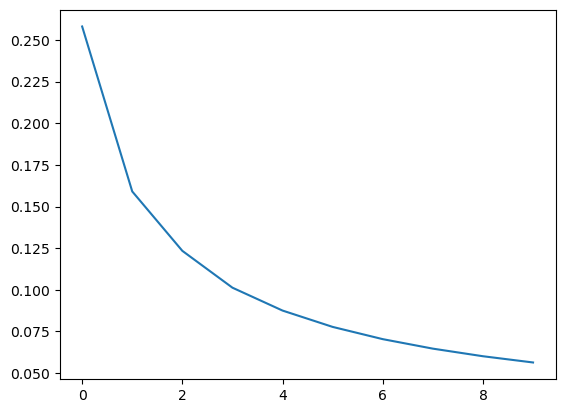

In [10]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from src.linear import Linear
from src.losses import MSELoss, CrossEntropyLoss, BinaryCrossEntropy, LogCrossEntropyLoss
from src.non_linear import TanH, Sigmoide, SoftMax
from src.encapsulation import Sequential, Optim
np.random.seed(42)


batch_size = 8

X, y = load_digits(return_X_y=True, n_class=2)
y_oh = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

net = Sequential(
    Linear(64, 32),
    TanH(),
    Linear(32, 16),
    TanH(),
    Linear(16, 8),
    TanH(),
    Linear(8, 2),
    Sigmoide(),
    # SoftMax(),
)

optimizer = Optim(net, CrossEntropyLoss(), eps=1e-2)
lossList = optimizer.SGD(X, y_oh, batch_size, 10)
print(lossList)
pd.Series(lossList).plot()
print(optimizer.score(X, y))
